# Machine Learning Tasks

## Task A - Clustering

### Download BBC sports dataset from the Cloud

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import PCA
from scipy.special import comb
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
!ls data

README.TXT           bbcsport_mtx.csv     football
athletics            bbcsport_terms.csv   rugby
bbcsport_classes.csv cricket              tennis


### Read files and store as variables

In [3]:
X = pd.read_csv('data/bbcsport_mtx.csv', header = None)
trueLabels = pd.read_csv('data/bbcsport_classes.csv', header = None)
terms = pd.read_csv('data/bbcsport_terms.csv', header = None)

### K-means Clustering: Euclidean Distance

In [4]:
avg_mutual_info_eucl = 0
avg_rand_index_eucl = 0

In [5]:
# running k-means for 50 random iterations

for i in range(50):
    kmeans_eucl = KMeans(n_clusters=5).fit(X)
    avg_mutual_info_eucl += adjusted_mutual_info_score(trueLabels[0].to_list(), kmeans_eucl.labels_)
    avg_rand_index_eucl += adjusted_rand_score(trueLabels[0].to_list(), kmeans_eucl.labels_)

In [6]:
avg_mutual_info_eucl /= 50
avg_rand_index_eucl /= 50

Clustering Performance:

In [7]:
print(avg_mutual_info_eucl, avg_rand_index_eucl)

0.18927119699765693 0.07641168809090852


### K-means Clustering: Cosine Distance

In [8]:
avg_mutual_info_cos = 0
avg_rand_index_cos = 0

In [9]:
# running k-means for 50 random iterations

for i in range(50):
    kmeans_cos = KMeans(n_clusters=5, precompute_distances = True).fit(cosine_distances(X))
    avg_mutual_info_cos += adjusted_mutual_info_score(trueLabels[0].to_list(), kmeans_cos.labels_)
    avg_rand_index_cos += adjusted_rand_score(trueLabels[0].to_list(), kmeans_cos.labels_)

In [10]:
avg_mutual_info_cos /= 50
avg_rand_index_cos /= 50

Clustering Performance:

In [11]:
print(avg_mutual_info_cos, avg_rand_index_cos)

0.608527333185795 0.5053504475521514


### Visualizing Word Cloud

#### Euclidean

In [12]:
eucl_centers = pd.DataFrame(kmeans_eucl.cluster_centers_)

In [13]:
# replacing column names with their words
eucl_centers.columns = list(terms.iloc[eucl_centers.columns, 0])

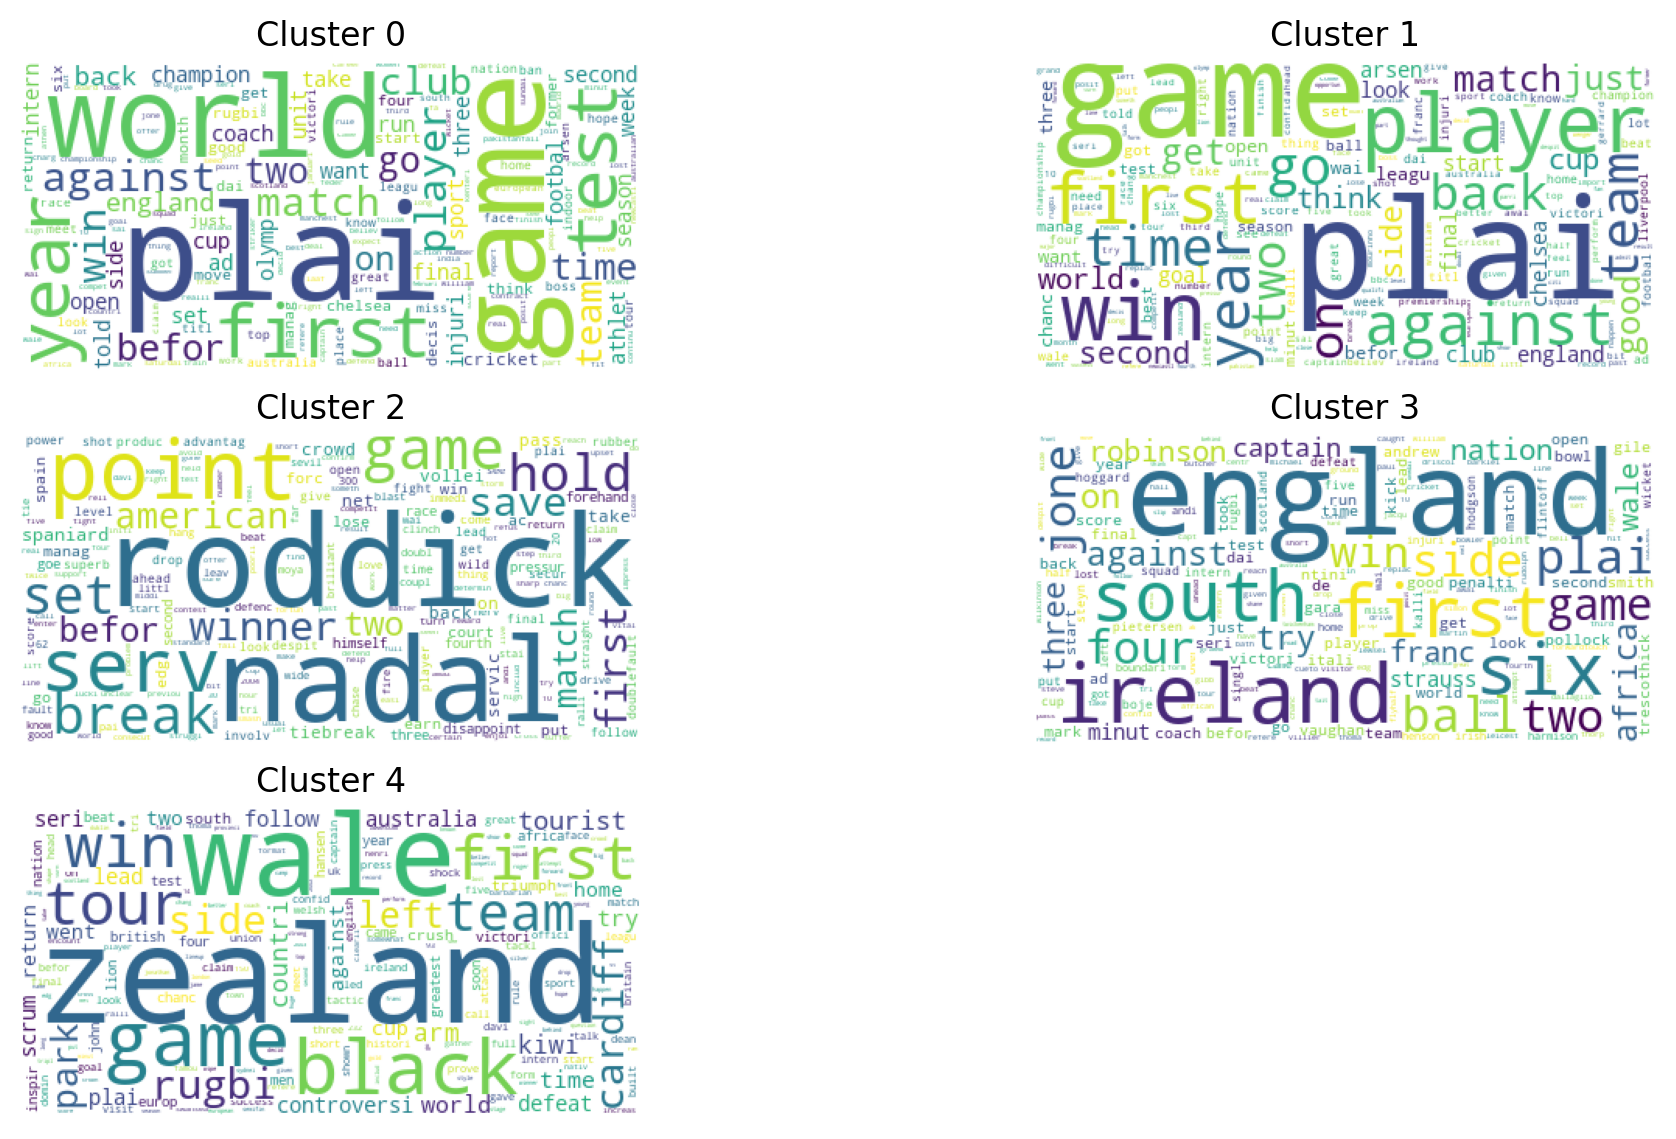

In [14]:
fig = plt.figure(figsize=(12,7), dpi = 200)

for i in range(0, len(eucl_centers)):
    wordcloud = WordCloud(background_color = 'white')
    kMeansWordCloud = wordcloud.generate_from_frequencies(dict(eucl_centers.T[i].reset_index().values))
    ax = fig.add_subplot(3,2,i+1)
    ax.imshow(kMeansWordCloud)
    ax.set_title("Cluster {0}".format(i))
    ax.axis("off")

#### Cosine

In [15]:
cos_centers = pd.DataFrame(kmeans_cos.cluster_centers_)

In [16]:
# replacing column names with their words
cos_centers.columns = list(terms.iloc[cos_centers.columns, 0])

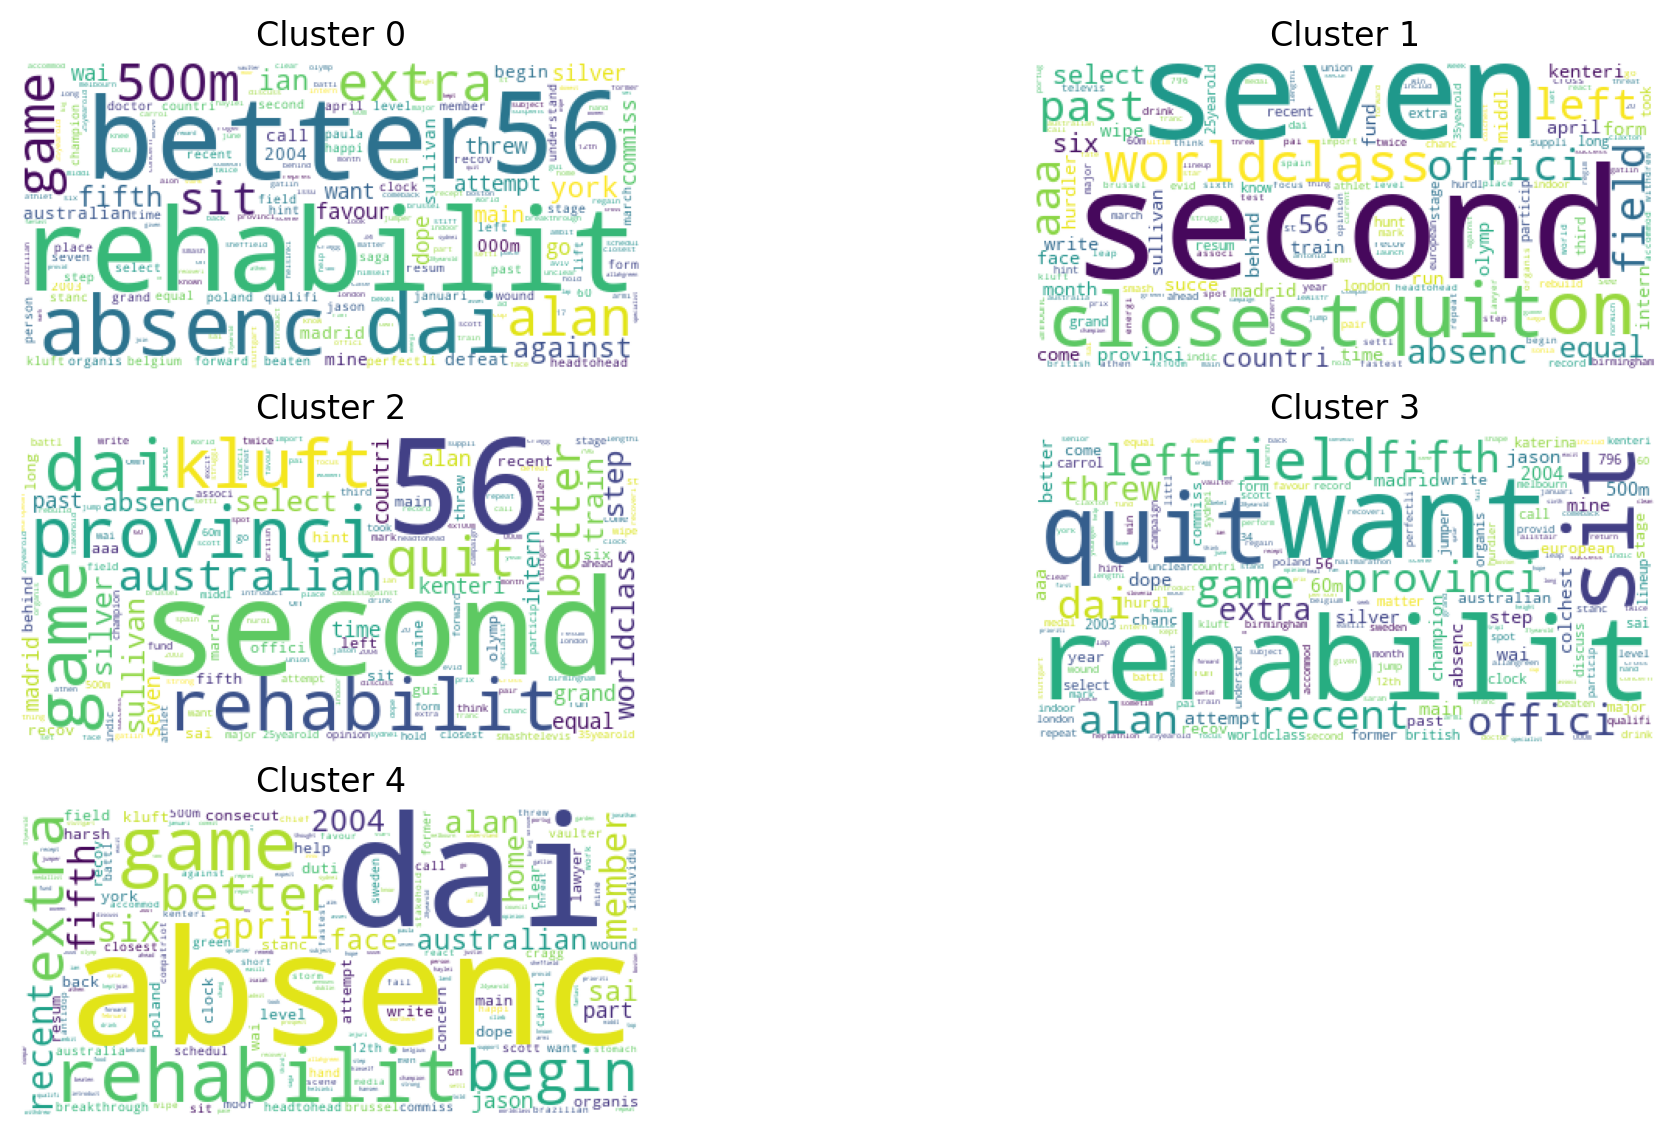

In [17]:
fig = plt.figure(figsize=(12,7), dpi = 200)

for i in range(0, len(cos_centers)):
    wordcloud = WordCloud(background_color = 'white')
    kMeansWordCloud = wordcloud.generate_from_frequencies(dict(cos_centers.T[i].reset_index().values))
    ax = fig.add_subplot(3,2,i+1)
    ax.imshow(kMeansWordCloud)
    ax.set_title("Cluster {0}".format(i))
    ax.axis("off")

## Task B - Dimensionality Reduction using PCA/SVD

In [18]:
pca = PCA(n_components = X.shape[0])
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

In [19]:
x_95 = len(explained_var[explained_var <= 0.95])
x_98 = len(explained_var[explained_var <= 0.98])

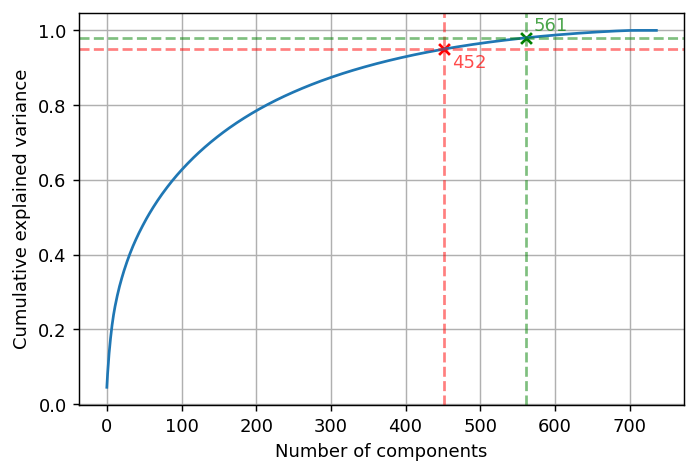

In [20]:
plt.figure(dpi = 130)
plt.plot(explained_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# 95% variance
y_line_annotation = 0.95
plt.axhline(y=y_line_annotation, linestyle='dashed', alpha=0.5, color = 'red')
plt.axvline(x=x_95, linestyle='dashed', alpha=0.5, color = 'red')
plt.scatter(x_95, y_line_annotation, marker= 'x', color = 'red')
plt.text(y=y_line_annotation - 0.05, x=x_95 + 10, s=x_95, alpha=0.7, color='red')

# 98% variance
y_line_annotation = 0.98
plt.axhline(y=y_line_annotation, linestyle='dashed', alpha=0.5, color = 'green')
plt.axvline(x=x_98, linestyle='dashed', alpha=0.5, color = 'green')
plt.scatter(x_98, y_line_annotation, marker= 'x', color = 'green')
plt.text(y=y_line_annotation + 0.02, x=x_98 + 10, s=x_98, alpha=0.7, color='green')
plt.grid()

In [21]:
print("Minimum dimension that captures:")
print("95% variance = {}".format(x_95))
print("98% variance = {}".format(x_98))

Minimum dimension that captures:
95% variance = 452
98% variance = 561
